In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
N1 = 10 #每层线圈数目
N2 = 20 #线圈层数
R0 = 38 # 线圈半径 mm
L0 = (380)/2 # 两个线圈之间距离 mm
I = 2 # 线圈电流 A
M = 100 #取点数
rtong = 0.5 #铜线半径 mm

In [14]:
def dB(r,dli,posi):
    u0 = 4*np.pi*10**-4 # T*mm/A 真空磁导率
    rvector = r-posi
    dB1 = np.cross(dli,rvector)
    rsize = np.sqrt(np.vdot(rvector,rvector))
    return u0*I*dB1/(4*np.pi*rsize**3)
    
    
def B1(R,L,r):
    #取线圈中间为坐标原点，轴线为Z方向，用柱坐标系
    angle = np.arange(0,2*np.pi,2*np.pi/M)
    xi  = angle
    xe = np.array(list(angle[1:])+[0])
    pos_i = []
    pos_e = []  #电流源的始末位置
    dl = [] #电流源
    for i in range(len(angle)):
        pos_i.append(np.array([R*np.cos(xi[i]),R*np.sin(xi[i]),L]))
        pos_e.append(np.array([R*np.cos(xe[i]),R*np.sin(xe[i]),L]))
    for j in range(len(angle)):
        dl.append(pos_e[j]-pos_i[j])
    
    Bx ,By ,Bz= [] ,[] ,[]
    for i in range(len(pos_i)):
        t=dB(r,dl[i],(pos_i[i]+ pos_e[i])/2)
        Bx.append(t[0])
        By.append(t[1])
        Bz.append(t[2])
    return np.array([np.sum(Bx) , np.sum(By) ,np.sum(Bz)])
    
def B2(R,L,r):
    #取线圈中间为坐标原点，轴线为Z方向，用柱坐标系
    angle = np.arange(0,2*np.pi,2*np.pi/M)
    xi  = angle
    xe = np.array(list(angle[1:])+[0])
    pos_i = []
    pos_e = []  #电流源的始末位置
    dl = [] #电流源
    for i in range(len(angle)):
        pos_i.append(np.array([R*np.cos(xi[i]),R*np.sin(xi[i]),-L]))
        pos_e.append(np.array([R*np.cos(xe[i]),R*np.sin(xe[i]),-L]))
    for j in range(len(angle)):
        dl.append(pos_e[j]-pos_i[j])
    
    Bx ,By ,Bz= [] ,[] ,[]
    for i in range(len(pos_i)):
        t=dB(r,dl[i],(pos_i[i]+ pos_e[i])/2)
        Bx.append(t[0])
        By.append(t[1])
        Bz.append(t[2])
    return np.array([np.sum(Bx) , np.sum(By) ,np.sum(Bz)])

def B(r):
    BTOT = []
    BTOTX = []
    BTOTY = []
    BTOTZ = [] 
    for j in range(N2):
        for i in range(N1):
            R = R0 + 2*i*rtong
            L= L0 + 2*j*rtong
            BTOT.append((B1(R,L,r) + B2(R,L,r))*10**7) #转换成mG
    for i in range(len(BTOT)):
        BT0TX = BTOTX.append(BTOT[i][0])
        BT0TY = BTOTY.append(BTOT[i][1])
        BT0TZ = BTOTZ.append(BTOT[i][2])
    return np.array([np.sum(BTOTX),np.sum(BTOTY),np.sum(BTOTZ)])
    
    
    
    


In [15]:

#z = np.array(list(range(-10,10,1)))/1000000 #-500um-500um3
#T = []
#for i in range(len(z)):
    #r = [0,0,z[i]]
    #T.append(B(r)[2])
#plt.plot(z,T)
#plt.xlabel("Z axis [m]")
#plt.ylabel("B [mGs]")
#plt.show()



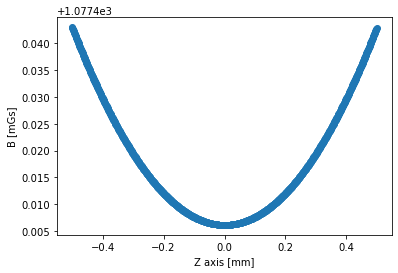

In [16]:
z = np.array(list(range(-500,500,1)))/1000 #-500um-500um
temp = np.array([B(np.array([0,0 , i])) for i in z])
plt.scatter(z,temp[:,2])
plt.xlabel("Z axis [mm]")
plt.ylabel("B [mGs]")
plt.show()